In [1]:
from numpy import linalg as LA
import numpy as np
import pandas as pd
import nltk
import re

In [2]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
import pylab as plt

#nltk.download()

In [3]:
# Чтение из файла
file = open('text.txt', 'r')
text = file.read()
file.close()

# количество слов в тексте
word_count = len(text.split(' '))
word_count

63

In [4]:
# очистка текстка от очистка от знаков препинания и стоп-слов:
stop_words = set(stopwords.words("english"))
words = nltk.word_tokenize(re.sub(r"[^\w]", " ", text))
word_clean = [word for word in words if not word in stop_words]
#print(word_clean)

In [5]:
# POS - teg к словам, определяющий часть речи
# Обозначения сокращений прилагается в "Penn Treebank P.O.S. Tags.html"
print(nltk.pos_tag(words))


[('Amy', 'NNP'), ('normally', 'RB'), ('hated', 'VBD'), ('Monday', 'NNP'), ('mornings', 'NNS'), ('but', 'CC'), ('this', 'DT'), ('year', 'NN'), ('was', 'VBD'), ('different', 'JJ'), ('Kamal', 'NNP'), ('was', 'VBD'), ('in', 'IN'), ('her', 'PRP$'), ('art', 'NN'), ('class', 'NN'), ('and', 'CC'), ('she', 'PRP'), ('liked', 'VBD'), ('Kamal', 'NNP'), ('She', 'PRP'), ('was', 'VBD'), ('waiting', 'VBG'), ('outside', 'IN'), ('the', 'DT'), ('classroom', 'NN'), ('when', 'WRB'), ('her', 'PRP$'), ('friend', 'NN'), ('Tara', 'NNP'), ('arrived', 'VBD'), ('Hi', 'NNP'), ('Amy', 'NNP'), ('Your', 'PRP$'), ('mum', 'NN'), ('sent', 'VBD'), ('me', 'PRP'), ('a', 'DT'), ('text', 'NN'), ('You', 'PRP'), ('forgot', 'VBP'), ('your', 'PRP$'), ('inhaler', 'NN'), ('Why', 'WRB'), ('don', 'NN'), ('t', 'NN'), ('you', 'PRP'), ('turn', 'VBP'), ('your', 'PRP$'), ('phone', 'NN'), ('on', 'IN'), ('Amy', 'NNP'), ('didn', 'NN'), ('t', 'NN'), ('like', 'IN'), ('technology', 'NN'), ('She', 'PRP'), ('never', 'RB'), ('sent', 'VBD'), ('tex

In [6]:
# Лемматизация с POS-тегом происходит в зависимости от части речи, 
# к которому относится слово 
# Привязка POS-тега 
def get_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

lemmatizer = WordNetLemmatizer()

lemma = ([lemmatizer.lemmatize(w, get_pos(w)) for w in words])
print (lemma)

['Amy', 'normally', 'hat', 'Monday', 'morning', 'but', 'this', 'year', 'be', 'different', 'Kamal', 'be', 'in', 'her', 'art', 'class', 'and', 'she', 'like', 'Kamal', 'She', 'be', 'wait', 'outside', 'the', 'classroom', 'when', 'her', 'friend', 'Tara', 'arrive', 'Hi', 'Amy', 'Your', 'mum', 'sent', 'me', 'a', 'text', 'You', 'forgot', 'your', 'inhaler', 'Why', 'don', 't', 'you', 'turn', 'your', 'phone', 'on', 'Amy', 'didn', 't', 'like', 'technology', 'She', 'never', 'sent', 'text', 'message', 'and', 'she', 'hat', 'Facebook', 'too']


In [7]:
# список слов, прошедших лемматизацию с POS-тегом
for i, el in enumerate(lemma):
    if not lemma[i]  is words[i]:
        print(words[i] , '-', lemma[i] )

hated - hat
mornings - morning
was - be
was - be
liked - like
was - be
waiting - wait
arrived - arrive
messages - message
hated - hat


In [8]:
# перевод в векторную форму:
vectorizer = CountVectorizer()
bag_words = vectorizer.fit_transform(lemma)
feature_names = vectorizer.get_feature_names()
# вывод матрицы в виде DF
pd.DataFrame(bag_words.toarray(), columns = feature_names)

,amy,and,arrive,art,be,but,class,classroom,didn,different,...,the,this,too,turn,wait,when,why,year,you,your
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
64,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
svd = TruncatedSVD(n_components=34)
svd.fit(bag_words)

TruncatedSVD(algorithm='randomized', n_components=34, n_iter=5,
             random_state=None, tol=0.0)

In [10]:
# сохраненное количество информации:
print(svd.explained_variance_ratio_.sum())

0.8060245678680082


In [11]:
array = []
for i in range(len(feature_names)) :
    svd = TruncatedSVD(n_components=(i))
    svd.fit(bag_words)
    array.append(svd.explained_variance_ratio_.sum())# =  svd.explained_variance_ratio_.sum()

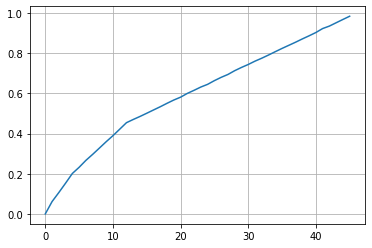

In [12]:
# график зависимости потери данных от количества компонент
plt.plot(array)
plt.grid()
plt.show()